In [3]:
# Import required libraries and dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [5]:
#Import csv into Colab
df_market_data = pd.read_csv("crypto_market_data.csv", index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [6]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


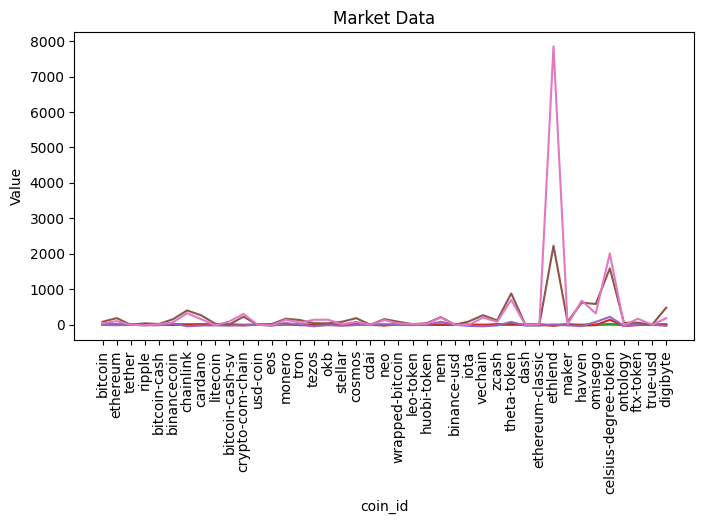

In [7]:
# Plot your data to see what's in your DataFrame
plt.figure(figsize=(8, 4))  # Set figure size
plt.plot(df_market_data.index, df_market_data.values)  # Plot the data
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.xlabel('coin_id')  # Set x-axis label
plt.ylabel('Value')  # Set y-axis label
plt.title('Market Data')  # Set plot title
plt.show()  # Show the plot

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_data_scaled = StandardScaler().fit_transform(
    df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]]
)

In [9]:
# Create a DataFrame with the scaled data
df_crypto_scaled = pd.DataFrame(
    crypto_data_scaled,
    columns = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",
                    "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
)

# Copy the crypto names from the original data
df_crypto_scaled["Coin ID"] = df_market_data.index
# Set the coinid column as index
df_crypto_scaled = df_crypto_scaled.set_index("Coin ID")

# Display sample data
df_crypto_scaled.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
Coin ID,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
monero,0.262723,1.792602,2.202665,1.437842,0.893865,-0.155893,-0.167644
tron,0.130050,-0.041018,0.147155,-0.543776,0.120116,-0.241118,-0.234014
vechain,0.585089,-0.994231,-2.217108,-0.603898,-0.930423,0.077149,-0.117482
usd-coin,0.034352,-0.733026,-0.023140,-0.065775,0.002925,-0.550599,-0.282232
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625
okb,-0.923203,-1.437359,-0.629963,-0.460558,-0.058504,-0.457283,-0.166900
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [10]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [11]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    # Create KMeans model with current value of k
    kmeans = KMeans(n_clusters=k)

    # Fit the model to the scaled data
    kmeans.fit(df_crypto_scaled)

    # Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120977, 66.09918779091186, 52.391938335436166, 44.25913586911816, 37.348403190232766, 32.485240832183536, 28.5718349688657, 24.267778057746405]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = []
for k, inertia in zip(k_values, inertia_values):
    # Append dictionary for each k and inertia pair
    elbow_data.append({"k": k, "inertia": inertia})

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)

     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   66.099188
5    6   52.391938
6    7   44.259136
7    8   37.348403
8    9   32.485241
9   10   28.571835
10  11   24.267778


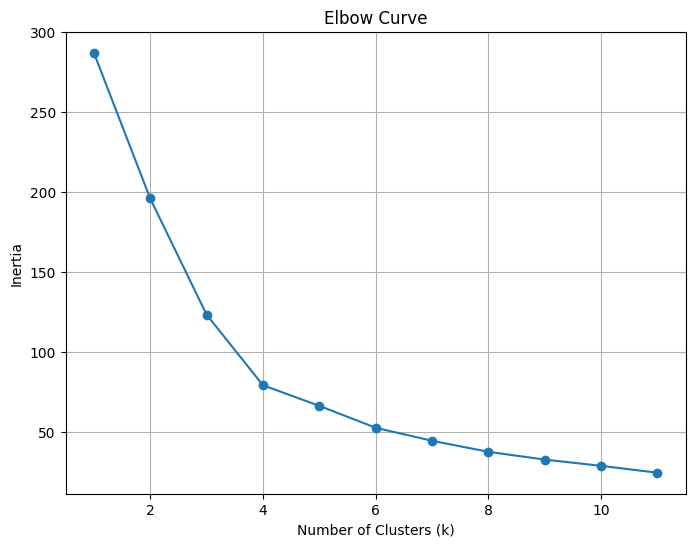

In [13]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [15]:
# Fit the K-Means model using the scaled data
model.fit(df_crypto_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [16]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(df_crypto_scaled)

# Print the resulting array of cluster values.
print(k_4)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [17]:
# Create a copy of the DataFrame
crypto_prediction_df = df_crypto_scaled.copy()

In [18]:
# Add a new column to the DataFrame with the predicted clusters
crypto_prediction_df["Crypto_segments"] = k_4

# Display sample data
crypto_prediction_df.sample(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Crypto_segments
Coin ID,,,,,,,,
binance-usd,0.061339,-0.706669,-0.015321,-0.058694,0.004017,-0.550003,-0.281963,3
theta-token,-1.612188,-1.682027,-0.816921,1.148607,1.712641,1.502992,0.286977,3
leo-token,0.051758,-0.928381,-0.871918,0.058782,-0.159250,-0.512071,-0.265036,3
digibyte,1.217453,-0.607714,-0.907066,0.449939,-0.662530,0.572367,-0.132482,3
havven,-1.428574,-0.025510,-1.628859,-0.860354,-0.840714,0.898815,0.268647,3
maker,-0.125168,0.580730,-0.202356,0.582911,-0.395923,-0.358240,-0.273433,0
true-usd,0.078038,-0.687745,-0.009191,-0.058214,0.007388,-0.550441,-0.281747,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
iota,0.259097,0.249508,-0.478953,-0.218997,-0.735815,-0.329179,-0.285310,3


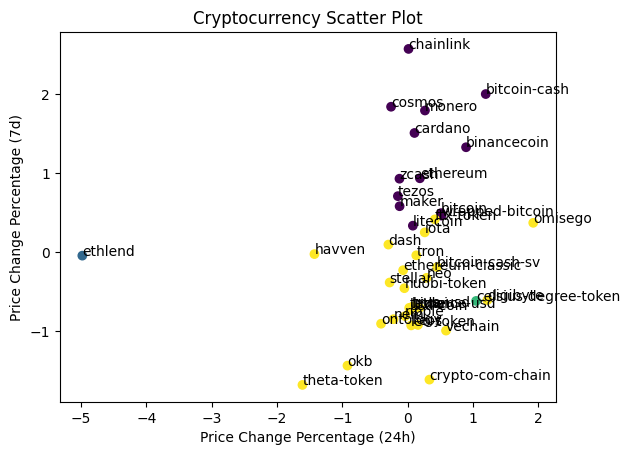

In [19]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and

plt.scatter(crypto_prediction_df['price_change_percentage_24h'],
            crypto_prediction_df['price_change_percentage_7d'],
            c=crypto_prediction_df['Crypto_segments'])

# Annotate each data point with the cryptocurrency name
for i, row in crypto_prediction_df.iterrows():
    plt.annotate(row.name, (row['price_change_percentage_24h'], row['price_change_percentage_7d']))

# Set labels and title
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Cryptocurrency Scatter Plot')

# Show the plot
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [20]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [21]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
crypto_pca = pca.fit_transform(crypto_prediction_df)
# View the first five rows of the DataFrame.
crypto_pca[:5]

array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ]])

In [22]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_


array([0.36941241, 0.29169375, 0.22893878])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89004494 or about 89%

In [23]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data

# Set the coinid column as index


# Display sample data
crypto_pca_df = pd.DataFrame(data=crypto_pca, index=crypto_prediction_df.index, columns=['PC1', 'PC2', 'PC3'])

# Display sample data
crypto_pca_df.sample(10)

,PC1,PC2,PC3
Coin ID,,,
ftx-token,-0.622694,-0.587809,0.275713
tron,-0.786538,-0.382913,0.303559
neo,-1.600606,-0.321262,0.022433
zcash,2.058316,-0.459102,-0.942991
havven,-1.956560,0.938434,-1.466931
ripple,-1.040919,-0.455234,0.467801
leo-token,-1.543865,-0.379812,0.444688
cardano,2.372449,-0.389146,-0.992513
cdai,-1.061363,-0.498291,0.622566


---

### Find the Best Value for k Using the PCA Data

In [24]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [25]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    # Create KMeans model with current value of k
    kmeans = KMeans(n_clusters=k)

    # Fit the model to the scaled data
    kmeans.fit(crypto_pca_df)

    # Append the inertia value to the inertia_values list
    inertia_values.append(kmeans.inertia_)

# Display the inertia values
print(inertia_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[325.7347395785631, 201.28762245654445, 111.73680938677693, 40.197284424059376, 29.94590949973295, 20.98891621954084, 15.365024356826599, 13.145039355762655, 9.665632617666285, 8.086145545979331, 6.611349231889498]


In [26]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = []
for k, inertia in zip(k_values, inertia_values):
    # Append dictionary for each k and inertia pair
    elbow_data_pca.append({"k": k, "inertia": inertia})

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)
print(df_elbow_pca)


     k     inertia
0    1  325.734740
1    2  201.287622
2    3  111.736809
3    4   40.197284
4    5   29.945909
5    6   20.988916
6    7   15.365024
7    8   13.145039
8    9    9.665633
9   10    8.086146
10  11    6.611349


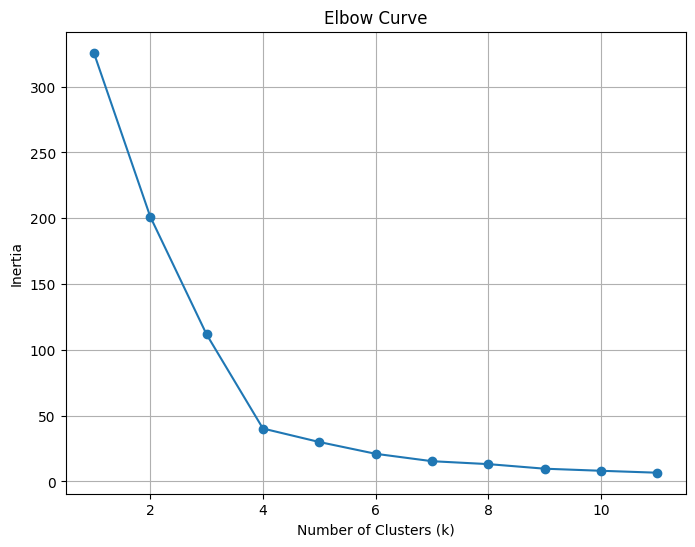

In [27]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [28]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [29]:
# Fit the K-Means model using the PCA data
model.fit(crypto_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [30]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = model.predict(crypto_pca_df)
# Print the resulting array of cluster values.
print(k_4)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [31]:
# Create a copy of the DataFrame with the PCA data
crypto_pca_prediction_df = crypto_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters

crypto_pca_prediction_df["PCA_segments"] = k_4
# Display sample data
crypto_pca_prediction_df.sample(10)

,PC1,PC2,PC3,PCA_segments
Coin ID,,,,
bitcoin-cash,3.302764,-1.242458,-0.217276,0
neo,-1.600606,-0.321262,0.022433,2
tron,-0.786538,-0.382913,0.303559,2
crypto-com-chain,-2.126715,-0.191442,0.129535,2
omisego,-0.897144,0.112481,1.350364,2
dash,-0.880733,-0.594293,-0.172796,2
maker,1.598712,-0.409341,-0.828938,0
cosmos,2.449141,-0.350412,-1.138638,0
iota,-0.956149,-0.743088,-0.136118,2


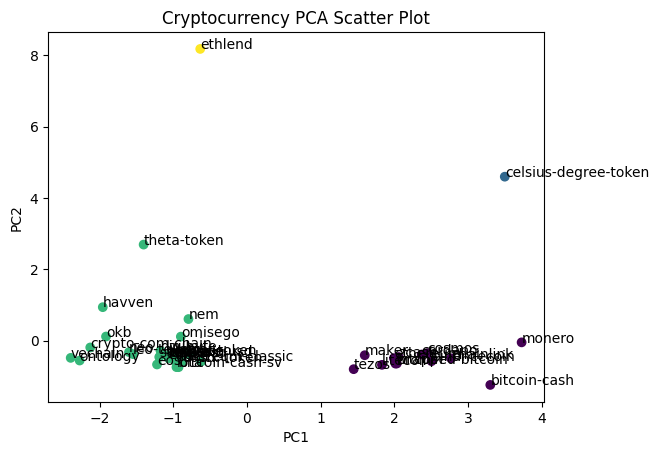

In [32]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
plt.scatter(crypto_pca_prediction_df['PC1'],
            crypto_pca_prediction_df['PC2'],
            c=crypto_pca_prediction_df['PCA_segments'])
for i, row in crypto_pca_prediction_df.iterrows():
    plt.annotate(row.name, (row['PC1'], row['PC2']))


# Set labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cryptocurrency PCA Scatter Plot')

# Show the plot
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

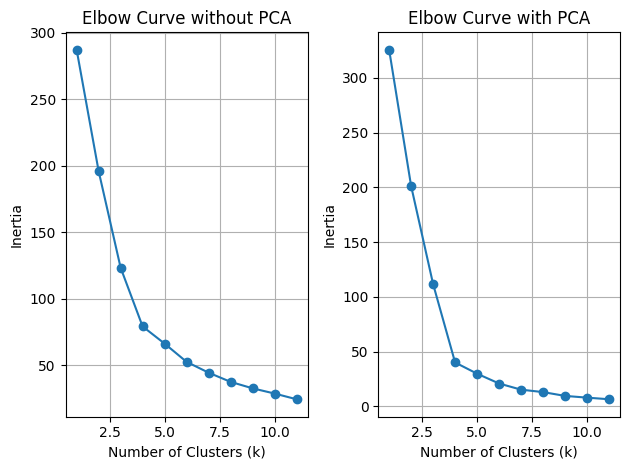

In [37]:
# Composite plot to contrast the Elbow curves

plt.subplot(1, 2, 1)
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve without PCA')
plt.grid(True)

# Plot Elbow Curve with PCA
plt.subplot(1, 2, 2)
plt.plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve with PCA')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

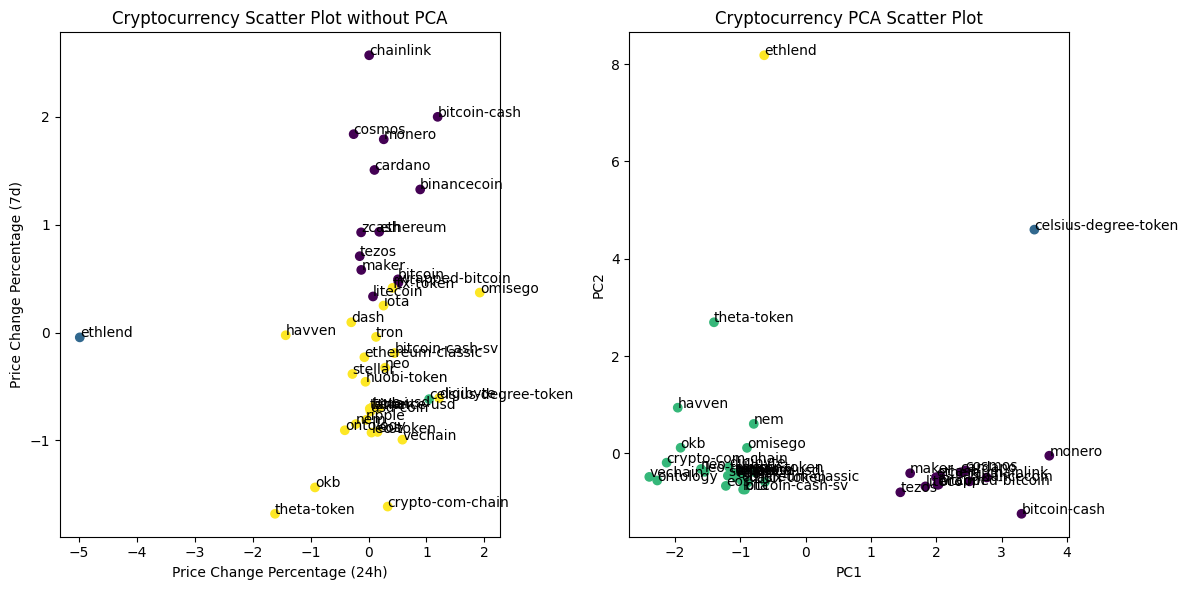

In [40]:
plt.figure(figsize=(12, 6))

# Plot Scatter Plot without PCA
plt.subplot(1, 2, 1)
plt.scatter(crypto_prediction_df['price_change_percentage_24h'], crypto_prediction_df['price_change_percentage_7d'], c=crypto_prediction_df['Crypto_segments'])
for i, row in crypto_prediction_df.iterrows():
    plt.annotate(row.name, (row['price_change_percentage_24h'], row['price_change_percentage_7d']))
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.title('Cryptocurrency Scatter Plot without PCA')

# Plot Scatter Plot with PCA
plt.subplot(1, 2, 2)
plt.scatter(crypto_pca_prediction_df['PC1'], crypto_pca_prediction_df['PC2'], c=crypto_pca_prediction_df['PCA_segments'])
for i, row in crypto_pca_prediction_df.iterrows():
    plt.annotate(row.name, (row['PC1'], row['PC2']))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cryptocurrency PCA Scatter Plot')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**